In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
mnist = keras.datasets.mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)

(60000, 28, 28)


0


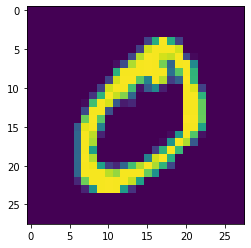

In [4]:
plt.figure()
plt.imshow(train_images[1])
print(train_labels[1])
plt.show()

In [5]:
list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10]

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [6]:
train_images.dtype

dtype('uint8')

In [7]:
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)))
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)))

255 0
255 0


In [8]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [9]:
train_images = train_images / 255

In [10]:
test_images = test_images / 255

In [11]:
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_images[0].reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]


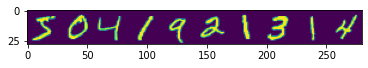

[5 0 4 1 9 2 1 3 1 4] (28, 280)


In [12]:
plt.imshow(np.hstack(train_images[:10]))
plt.show()
print(train_labels[:10], np.hstack(train_images[:10]).shape)

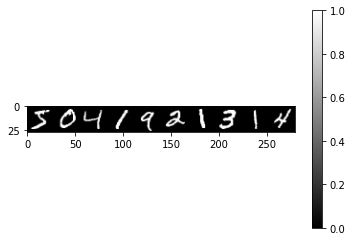

[5 0 4 1 9 2 1 3 1 4] (28, 280)


In [13]:
plt.imshow(np.hstack(train_images[:10]), cmap = "gray")
plt.colorbar()
plt.show()
print(train_labels[:10], np.hstack(train_images[:10]).shape)

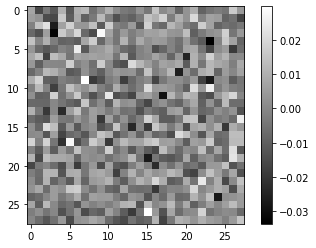

In [14]:
plt.imshow(np.random.normal(0.0, 0.01, (28, 28)), cmap = "gray")
plt.colorbar()
plt.show()

In [15]:
noisy_image = train_images[5] + np.random.normal(0.5, 0.1, (28, 28))

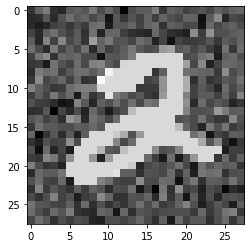

In [16]:
noisy_image[train_images[5] + np.random.normal(0.5, 0.1, (28, 28)) > 1.0] = 1.0
plt.imshow(noisy_image, cmap = "gray")
plt.show()

In [17]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0
test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

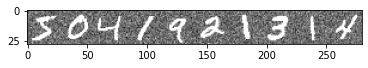

In [18]:
plt.imshow(np.hstack(train_noisy_images[:10]), cmap = "gray")
plt.show()

In [19]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [20]:
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [21]:
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

inputs = Input(shape = (28, 28))
x1 = SimpleRNN(64, activation = "tanh")(inputs)
x2 = Dense(10, activation = "softmax")(x1)
model = Model(inputs, x2)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
hist = model.fit(train_noisy_images, train_labels, validation_data = (test_noisy_images, test_labels), epochs = 5, verbose = 2)

Epoch 1/5
1875/1875 - 37s - loss: 0.7204 - accuracy: 0.7722 - val_loss: 0.4308 - val_accuracy: 0.8702 - 37s/epoch - 20ms/step
Epoch 2/5
1875/1875 - 32s - loss: 0.4020 - accuracy: 0.8791 - val_loss: 0.3393 - val_accuracy: 0.9001 - 32s/epoch - 17ms/step
Epoch 3/5
1875/1875 - 33s - loss: 0.3340 - accuracy: 0.9002 - val_loss: 0.2655 - val_accuracy: 0.9214 - 33s/epoch - 18ms/step
Epoch 4/5
1875/1875 - 33s - loss: 0.2918 - accuracy: 0.9137 - val_loss: 0.2648 - val_accuracy: 0.9186 - 33s/epoch - 18ms/step
Epoch 5/5
1875/1875 - 32s - loss: 0.2638 - accuracy: 0.9209 - val_loss: 0.2327 - val_accuracy: 0.9311 - 32s/epoch - 17ms/step


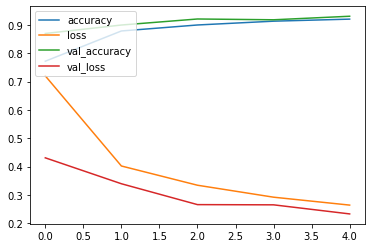

In [25]:
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'upper left')
plt.show()